<a href="https://colab.research.google.com/github/JorozcoBe/customer_engagement_assignment/blob/Portfolio/Case_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
## Read the files

df_usage_daily = pd.read_csv('/content/drive/MyDrive/TakehomeAssignment_ProductAnalyst/user_usage_daily.csv')
df_accounts = pd.read_csv('/content/drive/MyDrive/TakehomeAssignment_ProductAnalyst/accounts.csv')

In [3]:
#joining tables 
total_df =df_usage_daily.merge(df_accounts, how="left",on='portal_id')

In [4]:
#converting to datetime format

total_df['churn_date']=pd.to_datetime(total_df['churn_date'])

In [5]:
#converting to datetime format
total_df['date']=pd.to_datetime(total_df['date'])

In [6]:
total_df.tail()

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr
1090583,3C9YDB0SAP4JUBDN0GT2,74U77W9A8LYTUAG,media.view,image,2021-03-10,Voluptatem Non Ipsum SE,TIRC9ZD76S,Customer,0.0,0.0,51.0,3.Enterprise,NaT,2460.0
1090584,RD46ALHAJ88TD6HLW8R6,YEKV2DY4TKVV7PG,media.view,image,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000.0,100.0,16.0,2.Mid-Market,NaT,1330.0
1090585,KHJZCKKWG854ZT9VHJSI,YEKV2DY4TKVV7PG,media.view,document,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000.0,100.0,16.0,2.Mid-Market,NaT,1330.0
1090586,KVVEF29BG9VGLRD3ADJV,B8MSG4OGB1LRXGK,media.view,image,2021-03-12,Ipsum Velit Ut LLC,LCG1J5EWFW,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2022-01-24,0.0
1090587,8DTTLYNVXG6P5BLGSUN4,4YSD6SHQBA3RNQF,media.view,image,2021-03-15,Eius Quisquam Non LP,ZR3RZN9L3H,Customer,20.0,5.0,1.0,2.Mid-Market,NaT,16779.0


In [7]:
total_df.head()

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr
0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-02-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
1,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-05-20,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
2,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-02-19,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
3,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,user.login,NaN,2021-12-28,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
4,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-08-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0


In [ ]:
total_df.type.value_counts()

Customer       1068709
Ex-customer      21879
Name: type, dtype: int64

In [ ]:
#total_df to see how many unique datapoints we have for responding q1
unique_type =total_df.pivot_table(values="user_id", index="type", aggfunc=pd.Series.nunique)
unique_type

,user_id
type,
Customer,141708
Ex-customer,2856


In [ ]:
pivot_table11 =total_df.pivot_table(values="user_id", index=["type", 'churn_date'], aggfunc=pd.Series.nunique)
pivot_table11

user_id
type        churn_date         
Ex-customer 2019-12-31        1
            2020-01-03       63
            2020-01-05       12
            2020-03-12      495
            2020-08-26        5
            2020-09-06        3
            2020-11-13      136
            2020-11-15      396
            2020-12-31        6
            2021-01-14        9
            2021-01-27      142
            2021-02-18       17
            2021-03-12       12
            2021-03-20        4
            2021-03-29       11
            2021-04-02      202
            2021-04-28       10
            2021-04-30       43
            2021-05-02        8
            2021-05-27       17
            2021-06-25       24
            2021-06-30       83
            2021-07-29       17
            2021-08-30      100
            2021-08-31        6
            2021-09-01       27
            2021-09-20       15
            2021-09-30      136
            2021-10-23       26
            2021-11-02       22
            2021-11-19       18
            2021-11-25        1
            2021-12-06       19
            2021-12-14       25
            2021-12-19        2
            2022-01-04      205
            2022-01-08       41
            2022-01-24       20
            2022-01-30       14
            2022-03-05       82
            2022-03-27      327
            2022-03-31        8

The product organization would like to establish product engagement as a key
metric in business decisions. To investigate the relevance of this metric, find out
about its relationships with customer retention and revenue.


**For the ex-customers -- calculate the number of engaged users within the
last 20 days prior to churning.**




In [8]:
#Selecting only Ex-customer. 
ex_customer_df = total_df[total_df['type'] == 'Ex-customer']

In [9]:
ex_customer_df.head()

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr
4833,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.view,image,2021-09-01,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0
4835,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,user.create,NaN,2021-03-16,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0
4837,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.create,document,2021-04-20,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0
4839,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.view,image,2021-06-22,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0
4841,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.view,image,2021-07-15,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0


In [ ]:
from google.colab import files
ex_customer_df.to_csv('ex_customer_df.csv') 
files.download('ex_customer_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
ex_customer_df.churn_date.value_counts()

2022-03-27    4780
2020-03-12    3981
2021-01-27    2431
2020-11-15    1192
2020-11-13    1172
2021-04-30    1146
2021-09-30    1143
2022-01-04    1081
2020-01-03     588
2022-01-08     558
2021-04-02     506
2022-03-05     402
2021-08-30     294
2021-09-01     237
2021-06-25     225
2021-06-30     224
2021-02-18     213
2021-10-23     155
2021-12-14     127
2021-05-27     114
2022-01-30     110
2021-08-31      91
2021-12-06      90
2021-11-19      53
2021-11-02      51
2020-01-05      49
2021-03-12      42
2021-04-28      42
2021-09-20      36
2022-03-31      36
2022-01-24      29
2019-12-31      28
2021-07-29      24
2021-03-29      22
2021-05-02      20
2021-01-14      16
2021-03-20      15
2020-08-26      12
2020-12-31       9
2020-09-06       4
2021-12-19       3
2021-11-25       1
Name: churn_date, dtype: int64

In [11]:
#Adding a column with a fixed constant value in order to calculate the number of engaged users within the last 20 days prior churning
ex_customer_df.loc[:,'Interval'] = 20

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [12]:
#Substracting from churn date column the 20 days and creating a ex_engaged column that stores datetime associated with this engaged users
ex_customer_df['ex_engaged'] = ex_customer_df['churn_date'] -  pd.to_timedelta(ex_customer_df['Interval'], unit='d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
##ex_customer_df.head()
ex_customer_df.user_id.nunique()


2856

In [ ]:
#pivot to retrieve the number ex-customer prior 20 days of churning
pivot_count = ex_customer_df.pivot_table(values="user_id", index="ex_engaged", aggfunc=pd.Series.nunique)
pivot_count

,user_id
ex_engaged,
2019-12-11,1
2019-12-14,63
2019-12-16,12
2020-02-21,495
2020-08-06,5
2020-08-17,3
2020-10-24,136
2020-10-26,396
2020-12-11,6


In [ ]:
#Same as prior cell but with lamba function
#ex_customer_df.groupby('ex_engaged').user_id.nunique()
q1_pivot=ex_customer_df.pivot_table(values='user_id', index='ex_engaged', aggfunc=lambda x: len(x.unique()))
q1_pivot


,user_id
ex_engaged,
2019-12-11,1
2019-12-14,63
2019-12-16,12
2020-02-21,495
2020-08-06,5
2020-08-17,3
2020-10-24,136
2020-10-26,396
2020-12-11,6


In [ ]:
ex_customer_df

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr,Interval,ex_engaged
4833,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.view,image,2021-09-01,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0,20,2021-06-05
4835,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,user.create,NaN,2021-03-16,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0,20,2021-06-05
4837,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.create,document,2021-04-20,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0,20,2021-06-05
4839,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.view,image,2021-06-22,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0,20,2021-06-05
4841,6C15R5BO46Y8N5MU56FF,B0MQOQ4KREG167D,media.view,image,2021-07-15,Quaerat Etincidunt Aliquam Corp.,NHJ7XVG0FN,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2021-06-25,0.0,20,2021-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090475,17GOZF4SY1E3IL0SWZDU,V9BD9ZMQ77HNS54,media.view,document,2021-03-13,Tempora Numquam Quisquam SE,HMEWCJN6OC,Ex-customer,0.0,0.0,0.0,2.Mid-Market,NaT,0.0,20,NaT
1090476,0GTBAFCKSGGYVDNZEFX0,V9BD9ZMQ77HNS54,media.view,image,2021-03-15,Tempora Numquam Quisquam SE,HMEWCJN6OC,Ex-customer,0.0,0.0,0.0,2.Mid-Market,NaT,0.0,20,NaT
1090531,X8PV0C6CGEWC1G0RF4KG,TMNI3GOM6736Z4D,media.view,image,2021-03-12,Ut Aliquam Velit BV,NS832EJX5T,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2022-01-08,0.0,20,2021-12-19
1090532,4Y8ZW1SY9ASIA0621SG7,TMNI3GOM6736Z4D,media.view,video,2021-03-15,Ut Aliquam Velit BV,NS832EJX5T,Ex-customer,0.0,0.0,0.0,2.Mid-Market,2022-01-08,0.0,20,2021-12-19


For current customers -- calculate the
number of engaged users in the last 20 days of the year 2021. Compare
the engagement levels between these two cohorts.

In [14]:
#Creating the dataset with only 'Customer'
customer_df = total_df[total_df['type'] == 'Customer']

In [ ]:
from google.colab import files
customer_df.to_csv('customer_df.csv') 
files.download('customer_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
customer_df

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr
0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-02-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
1,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-05-20,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
2,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-02-19,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
3,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,user.login,NaN,2021-12-28,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
4,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-08-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090582,157VC692X81QW1SV9PGJ,DY0VQXO2DWN717Y,media.view,image,2021-03-15,Magnam Sit Dolorem SE,WQ1GAZ5UH8,Customer,50.0,10.0,4.0,3.Enterprise,NaT,1760.0
1090583,3C9YDB0SAP4JUBDN0GT2,74U77W9A8LYTUAG,media.view,image,2021-03-10,Voluptatem Non Ipsum SE,TIRC9ZD76S,Customer,0.0,0.0,51.0,3.Enterprise,NaT,2460.0
1090584,RD46ALHAJ88TD6HLW8R6,YEKV2DY4TKVV7PG,media.view,image,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000.0,100.0,16.0,2.Mid-Market,NaT,1330.0
1090585,KHJZCKKWG854ZT9VHJSI,YEKV2DY4TKVV7PG,media.view,document,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000.0,100.0,16.0,2.Mid-Market,NaT,1330.0


In [ ]:
pivot_table3= customer_df.pivot_table(values='user_id', index='date', aggfunc=lambda x: len(x.unique()))
pivot_table3

,user_id
date,
2021-01-01,115
2021-01-02,126
2021-01-03,181
2021-01-04,2325
2021-01-05,2514
...,...
2021-12-27,1058
2021-12-28,1414
2021-12-29,1433


In [16]:
#Last 20 days of the 2021, I'm creating another dataset, q2, that captures the customer of last 20 days of 2021
q2= customer_df[customer_df["date"] >= (pd.to_datetime('31/12/2021') - pd.Timedelta(days=20))]

In [17]:
q2

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr
3,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,user.login,NaN,2021-12-28,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
14,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-12-20,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
15,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.view,document,2021-12-27,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
23,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,user.login,NaN,2021-12-20,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
79,RPHT28C8CFL1ZYPEQVV4,NXHBQAM97XO485D,media.download,document,2021-12-14,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaT,40730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085482,YRX3IYCBEXUBJ8BDISPX,GKJ71K16Y0UPU53,media.view,image,2021-12-15,Dolore Numquam Labore LLC,BTR23QIUA0,Customer,60.0,20.0,3.0,2.Mid-Market,NaT,15654.0
1085483,YRX3IYCBEXUBJ8BDISPX,GKJ71K16Y0UPU53,media.create,video,2021-12-18,Dolore Numquam Labore LLC,BTR23QIUA0,Customer,60.0,20.0,3.0,2.Mid-Market,NaT,15654.0
1085484,HP0JE688HCJA8TCHILNK,GKJ71K16Y0UPU53,media.create,image,2021-12-16,Dolore Numquam Labore LLC,BTR23QIUA0,Customer,60.0,20.0,3.0,2.Mid-Market,NaT,15654.0
1085485,5N95OY2E63VBUE64K85S,U1S5N18BYPKNXMF,user.login,NaN,2021-12-22,Magnam Quisquam Etincidunt SE,53UY8U118Q,Customer,100.0,10.0,2.0,2.Mid-Market,NaT,17555.0


In [ ]:
from google.colab import files
customer_df.to_csv('q2.csv') 
files.download('q2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
q2.date.value_counts()

In [ ]:
#pivot table containing the last 20 days (I gotta remove the 2021-12-11 row, so 20 days it is)
q2_pivot=q2.pivot_table(values='user_id', index=['date'] , aggfunc=lambda x: len(x.unique()))
q2_pivot

,user_id
date,
2021-12-11,293
2021-12-12,387
2021-12-13,3831
2021-12-14,4107
2021-12-15,3821
2021-12-16,3725
2021-12-17,3037
2021-12-18,290
2021-12-19,323


In [ ]:
#I want to dive deep about what features this group does, so I output a pivot table with queue_id and date as index
q3_pivot=q2.pivot_table(values='user_id', index=['date','queue_id'] , aggfunc=lambda x: len(x.unique()))
q3_pivot

user_id
date       queue_id               
2021-12-11 guideline.view        5
           job.create            3
           media.archive         3
           media.create          8
           media.download       47
...                            ...
2021-12-31 media.share           6
           media.view          167
           search.keyword       80
           user.create           1
           user.login          251

[236 rows x 1 columns]

In [ ]:
from google.colab import files
customer_df.to_csv('q2.csv') 
files.download('q2.csv')

In [ ]:
#Overall table
q3_pivot=q2.pivot_table(values='user_id', index='queue_id', aggfunc=lambda x: len(x.unique()))
q3_pivot

,user_id
queue_id,
guideline.view,507
job.create,244
job.finish,99
media.archive,53
media.create,907
media.download,5484
media.remove,142
media.share,402
media.view,9831


In [ ]:
from google.colab import files
q3_pivot.to_csv('q3_pivot.csv') 
files.download('q3_pivot.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
customer_df.dtypes

user_id                     object
portal_id                   object
queue_id                    object
media_type                  object
date                datetime64[ns]
name                        object
account_id                  object
type                        object
of_light_users             float64
of_regular_users           float64
of_admin_users             float64
company_size                object
churn_date          datetime64[ns]
arr                        float64
dtype: object

For current customers, calculate the engagement ratio by dividing the
number of engaged users by the sum of user licenses. Visualize the
association between engagement ratio and revenue.

In [18]:
#First off, converting the columns into int64

customer_df['of_light_users'] = customer_df['of_light_users'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#First off, converting the columns into int64

customer_df['of_regular_users'] = customer_df['of_regular_users'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#First off, converting the columns into int64
#Primero, convirtiendo las columnas en int64
customer_df['of_admin_users'] = customer_df['of_admin_users'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
#I may need to tranform this column because it is related to question about the ratio
customer_df['arr'] = customer_df['arr'].replace(np.nan, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
customer_df['arr'] = customer_df['arr'].astype(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
customer_df

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr
0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-02-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730
1,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-05-20,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730
2,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-02-19,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730
3,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,user.login,NaN,2021-12-28,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730
4,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-08-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090582,157VC692X81QW1SV9PGJ,DY0VQXO2DWN717Y,media.view,image,2021-03-15,Magnam Sit Dolorem SE,WQ1GAZ5UH8,Customer,50,10,4,3.Enterprise,NaT,1760
1090583,3C9YDB0SAP4JUBDN0GT2,74U77W9A8LYTUAG,media.view,image,2021-03-10,Voluptatem Non Ipsum SE,TIRC9ZD76S,Customer,0,0,51,3.Enterprise,NaT,2460
1090584,RD46ALHAJ88TD6HLW8R6,YEKV2DY4TKVV7PG,media.view,image,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000,100,16,2.Mid-Market,NaT,1330
1090585,KHJZCKKWG854ZT9VHJSI,YEKV2DY4TKVV7PG,media.view,document,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000,100,16,2.Mid-Market,NaT,1330


In [26]:
#Need to know how many unique users (user_id) log in
customer_df.user_id.nunique()

141708

In [27]:
#Creating the column with the sum of these three columns 
columns_list = ['of_light_users', 'of_regular_users','of_admin_users' ]

In [28]:
#Allocating the column into the dataframe 'customer_df'

customer_df['sum'] = customer_df[columns_list].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
customer_df

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr,sum
0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-02-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730,163
1,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-05-20,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730,163
2,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,search.keyword,NaN,2021-02-19,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730,163
3,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,user.login,NaN,2021-12-28,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730,163
4,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-08-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090582,157VC692X81QW1SV9PGJ,DY0VQXO2DWN717Y,media.view,image,2021-03-15,Magnam Sit Dolorem SE,WQ1GAZ5UH8,Customer,50,10,4,3.Enterprise,NaT,1760,64
1090583,3C9YDB0SAP4JUBDN0GT2,74U77W9A8LYTUAG,media.view,image,2021-03-10,Voluptatem Non Ipsum SE,TIRC9ZD76S,Customer,0,0,51,3.Enterprise,NaT,2460,51
1090584,RD46ALHAJ88TD6HLW8R6,YEKV2DY4TKVV7PG,media.view,image,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000,100,16,2.Mid-Market,NaT,1330,1116
1090585,KHJZCKKWG854ZT9VHJSI,YEKV2DY4TKVV7PG,media.view,document,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000,100,16,2.Mid-Market,NaT,1330,1116


In [30]:
#making a copy for upcoming manupilation
customer_copy2 =customer_df[['user_id', 'portal_id', 'queue_id', 'media_type', 'date', 'name', 'account_id','type', 'of_light_users', 'of_regular_users', 'of_admin_users','company_size', 'churn_date','arr', 'sum']].copy()

In [31]:
customer_copy2['name'].nunique()

787

In [32]:
customer_copy2['sum'].nunique()

423

In [33]:
customer_copy2['user_id'].nunique()

141708

In [35]:
#I may need to see unique values for 'sum' (Sum of licenses), so I subset given 'sum'
remove_sum=customer_copy2.drop_duplicates(subset=['sum'])

In [36]:
remove_sum

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr,sum
0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,2021-02-12,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150,10,3,2.Mid-Market,NaT,40730,163
789,6C15R5BO46Y8N5MU56FF,MO1DXQ46GA2SDFC,user.create,NaN,2021-09-27,Etincidunt Magnam Amet Corp.,J70E3P15AH,Customer,850,30,3,2.Mid-Market,NaT,20480,883
883,6C15R5BO46Y8N5MU56FF,RX8U73NKBF2E6WP,media.download,document,2021-10-19,Velit Tempora Adipisci BV,OZTP7BD4W1,Customer,1005,15,3,2.Mid-Market,NaT,58930,1023
1176,6C15R5BO46Y8N5MU56FF,QWP8XFANS0GNH8S,media.view,image,2021-04-30,Sit Sed Adipisci LLC,UWRXZE1HM3,Customer,2500,100,5,3.Enterprise,NaT,48220,2605
1253,6C15R5BO46Y8N5MU56FF,WYIX7BRRBAI3AL6,media.view,image,2021-01-13,Dolor Velit Ut BV,7QHAK7MDWK,Customer,300,70,6,2.Mid-Market,NaT,52670,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427655,B6APLMFVZ31NBAGHPEOV,LDO1VA1QOXM8BVZ,user.login,NaN,2021-12-02,Quiquia Numquam Labore BV,XF50I6GBXQ,Customer,4000,15,3,3.Enterprise,NaT,17235,4018
637029,8HBUOEZB7RT2O4I61DNT,P18OBS7587H91EL,user.login,NaN,2021-10-20,Adipisci Consectetur Ut Corp.,CKJLTEIYZC,Customer,50,80,13,2.Mid-Market,NaT,14079,143
637031,8HBUOEZB7RT2O4I61DNT,61BGMY4IQZ6DF08,user.login,NaN,2021-12-21,Aliquam Ut Dolore SE,V5G10UR5L8,Customer,1000,25,11,3.Enterprise,NaT,12245,1036
1022646,BR534R5DNHS80HBDNKD7,ZP1OQKV0N4H2AWN,user.login,NaN,2021-10-18,Est Dolorem Eius BV,M2XIPRTT3N,Customer,1250,10,7,2.Mid-Market,NaT,16168,1267


In [ ]:
from google.colab import files
remove_sum.to_csv('remove_sum.csv') 
files.download('remove_sum.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
#Once exported there are some outliers that need to be addressed. Once cleaned, I upload the new dataset for calculation of engagement ratio

removed_cleaned = pd.read_csv('/content/drive/MyDrive/removed_cleaned.txt', sep='\t')

In [56]:
removed_cleaned.head()

,Column1,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr,sum
0,0.0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,12/02/2021,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaN,40730.0,163.0
1,789.0,6C15R5BO46Y8N5MU56FF,MO1DXQ46GA2SDFC,user.create,NaN,27/09/2021,Etincidunt Magnam Amet Corp.,J70E3P15AH,Customer,850.0,30.0,3.0,2.Mid-Market,NaN,20480.0,883.0
2,883.0,6C15R5BO46Y8N5MU56FF,RX8U73NKBF2E6WP,media.download,document,19/10/2021,Velit Tempora Adipisci BV,OZTP7BD4W1,Customer,1005.0,15.0,3.0,2.Mid-Market,NaN,58930.0,1023.0
3,1176.0,6C15R5BO46Y8N5MU56FF,QWP8XFANS0GNH8S,media.view,image,30/04/2021,Sit Sed Adipisci LLC,UWRXZE1HM3,Customer,2500.0,100.0,5.0,3.Enterprise,NaN,48220.0,2605.0
4,1253.0,6C15R5BO46Y8N5MU56FF,WYIX7BRRBAI3AL6,media.view,image,13/01/2021,Dolor Velit Ut BV,7QHAK7MDWK,Customer,300.0,70.0,6.0,2.Mid-Market,NaN,52670.0,376.0


In [58]:
#Adding the sum of licenses as a column 
removed_cleaned['total'] = removed_cleaned['sum'].sum()     
print(removed_cleaned)  

       Column1               user_id        portal_id        queue_id  \
0          0.0  CFO1YN1U4L8XPD1F8PFX  NXHBQAM97XO485D  media.download   
1        789.0  6C15R5BO46Y8N5MU56FF  MO1DXQ46GA2SDFC     user.create   
2        883.0  6C15R5BO46Y8N5MU56FF  RX8U73NKBF2E6WP  media.download   
3       1176.0  6C15R5BO46Y8N5MU56FF  QWP8XFANS0GNH8S      media.view   
4       1253.0  6C15R5BO46Y8N5MU56FF  WYIX7BRRBAI3AL6      media.view   
..         ...                   ...              ...             ...   
381   637029.0  8HBUOEZB7RT2O4I61DNT  P18OBS7587H91EL      user.login   
382   637031.0  8HBUOEZB7RT2O4I61DNT  61BGMY4IQZ6DF08      user.login   
383  1022646.0  BR534R5DNHS80HBDNKD7  ZP1OQKV0N4H2AWN      user.login   
384  1041721.0  VPF93P5121NKR2YUXH9X  F7MVQ356J0JE3MK      job.create   
385        NaN                   NaN              NaN             NaN   

    media_type        date                           name  account_id  \
0     document  12/02/2021    Aliquam Tempora Quis

To calculate the engagement ratio I divide the number of unique ```user_id = 1417078 ``` over new column ```total= 273089```. The result is **0.5189**





In [60]:
#Adding a column with a fixed constant value in order to visualize the relation between engagement ratio and ARR
removed_cleaned.loc[:,'Engagement_ratio'] = 0.52

In [63]:
removed_cleaned.drop('Column1', axis=1, inplace=True)

In [64]:
removed_cleaned.head()

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr,sum,total,Engagement_ratio
0,CFO1YN1U4L8XPD1F8PFX,NXHBQAM97XO485D,media.download,document,12/02/2021,Aliquam Tempora Quisquam BV,Y4XKSS0KB6,Customer,150.0,10.0,3.0,2.Mid-Market,NaN,40730.0,163.0,273089.0,0.52
1,6C15R5BO46Y8N5MU56FF,MO1DXQ46GA2SDFC,user.create,NaN,27/09/2021,Etincidunt Magnam Amet Corp.,J70E3P15AH,Customer,850.0,30.0,3.0,2.Mid-Market,NaN,20480.0,883.0,273089.0,0.52
2,6C15R5BO46Y8N5MU56FF,RX8U73NKBF2E6WP,media.download,document,19/10/2021,Velit Tempora Adipisci BV,OZTP7BD4W1,Customer,1005.0,15.0,3.0,2.Mid-Market,NaN,58930.0,1023.0,273089.0,0.52
3,6C15R5BO46Y8N5MU56FF,QWP8XFANS0GNH8S,media.view,image,30/04/2021,Sit Sed Adipisci LLC,UWRXZE1HM3,Customer,2500.0,100.0,5.0,3.Enterprise,NaN,48220.0,2605.0,273089.0,0.52
4,6C15R5BO46Y8N5MU56FF,WYIX7BRRBAI3AL6,media.view,image,13/01/2021,Dolor Velit Ut BV,7QHAK7MDWK,Customer,300.0,70.0,6.0,2.Mid-Market,NaN,52670.0,376.0,273089.0,0.52


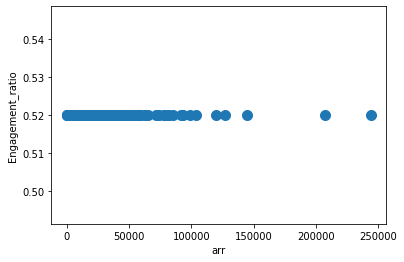

In [68]:
#Visualize relation between ratio and ARR

import matplotlib.pyplot as plt

removed_cleaned.plot.scatter(x = 'arr', y = 'Engagement_ratio', s = 100);

In [ ]:
from google.colab import files
pivot_sum2.to_csv('pivot_sum2.csv') 
files.download('pivot_sum2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
customer_copy2.tail()

,user_id,portal_id,queue_id,media_type,date,name,account_id,type,of_light_users,of_regular_users,of_admin_users,company_size,churn_date,arr,sum
1090582,157VC692X81QW1SV9PGJ,DY0VQXO2DWN717Y,media.view,image,2021-03-15,Magnam Sit Dolorem SE,WQ1GAZ5UH8,Customer,50,10,4,3.Enterprise,NaT,1760.0,64
1090583,3C9YDB0SAP4JUBDN0GT2,74U77W9A8LYTUAG,media.view,image,2021-03-10,Voluptatem Non Ipsum SE,TIRC9ZD76S,Customer,0,0,51,3.Enterprise,NaT,2460.0,51
1090584,RD46ALHAJ88TD6HLW8R6,YEKV2DY4TKVV7PG,media.view,image,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000,100,16,2.Mid-Market,NaT,1330.0,1116
1090585,KHJZCKKWG854ZT9VHJSI,YEKV2DY4TKVV7PG,media.view,document,2021-03-10,Ut Etincidunt Voluptatem LP,TJQ8ZGVWWU,Customer,1000,100,16,2.Mid-Market,NaT,1330.0,1116
1090587,8DTTLYNVXG6P5BLGSUN4,4YSD6SHQBA3RNQF,media.view,image,2021-03-15,Eius Quisquam Non LP,ZR3RZN9L3H,Customer,20,5,1,2.Mid-Market,NaT,16779.0,26


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
customer_copy2.user_id.nunique()

141708

In [ ]:
customer_df.user_id.nunique()

141708

In [ ]:
customer_df['portal_id'].nunique()


787

In [ ]:
customer_df['sum'].nunique()

423